In [73]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot

In [3]:
file = "/Users/saikatbasu/Documents/PersonalInformation_Oct2022/IBMDataScience-Coursera/DataAnalysisWithPython-7of12/Module2-DataWrangling/usedcars.csv"
header_file = "/Users/saikatbasu/Documents/PersonalInformation_Oct2022/IBMDataScience-Coursera/DataAnalysisWithPython-7of12/Module2-DataWrangling/headers.csv"
df = pd.read_csv(file, header=None)

In [5]:
df_header = pd.read_csv(header_file)

In [20]:
new_headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [43]:
df.replace('?', np.nan, inplace=True)
mean_price = df['price'].astype('float').mean()

In [99]:
mean_loss = df['normalized-losses'].astype('float').mean()
mean_loss

122.0

In [107]:
df['price'].replace(np.NaN, mean_price)
df['normalized-losses'].replace(np.NaN, mean_loss,inplace=True)

In [161]:
#df['normalized-losses'].replace(np.NaN,mean_loss,inplace=True)
index = df[df['price'].isnull()].index
df.drop(index,inplace=True)



In [163]:
df[df['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [74]:
missing_df = df.isnull()
cols = missing_df.columns.to_list()

In [75]:
for col in cols:
    print(missing_df[col].value_counts())

symboling
False    205
Name: count, dtype: int64
normalized-losses
False    164
True      41
Name: count, dtype: int64
make
False    205
Name: count, dtype: int64
fuel-type
False    205
Name: count, dtype: int64
aspiration
False    205
Name: count, dtype: int64
num-of-doors
False    203
True       2
Name: count, dtype: int64
body-style
False    205
Name: count, dtype: int64
drive-wheels
False    205
Name: count, dtype: int64
engine-location
False    205
Name: count, dtype: int64
wheel-base
False    205
Name: count, dtype: int64
length
False    205
Name: count, dtype: int64
width
False    205
Name: count, dtype: int64
height
False    205
Name: count, dtype: int64
curb-weight
False    205
Name: count, dtype: int64
engine-type
False    205
Name: count, dtype: int64
num-of-cylinders
False    205
Name: count, dtype: int64
engine-size
False    205
Name: count, dtype: int64
fuel-system
False    205
Name: count, dtype: int64
bore
False    201
True       4
Name: count, dtype: int64
stroke
False

In [169]:
mean_bore = df['bore'].astype('float').mean(axis=0)
mean_stroke = df['stroke'].astype('float').mean(axis=0)
mean_hp = df['horsepower'].astype('float').mean(axis=0)

In [170]:
df['bore'].replace(np.NaN,mean_bore,inplace=True)
df['stroke'].replace(np.NaN,mean_stroke,inplace=True)
df['horsepower'].replace(np.NaN,mean_hp,inplace=True)

(array([ 1.,  1.,  8., 35., 39., 28., 27., 42., 17.,  3.]),
 array([2.54, 2.68, 2.82, 2.96, 3.1 , 3.24, 3.38, 3.52, 3.66, 3.8 , 3.94]),
 <BarContainer object of 10 artists>)

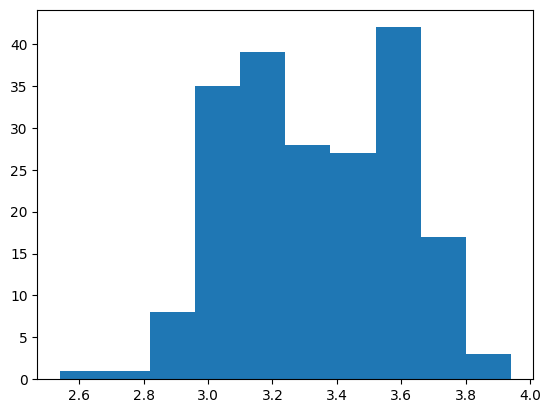

In [186]:
df['bore'] = df['bore'].astype('float')
pyplot.hist(df['bore'])

<BarContainer object of 7 artists>

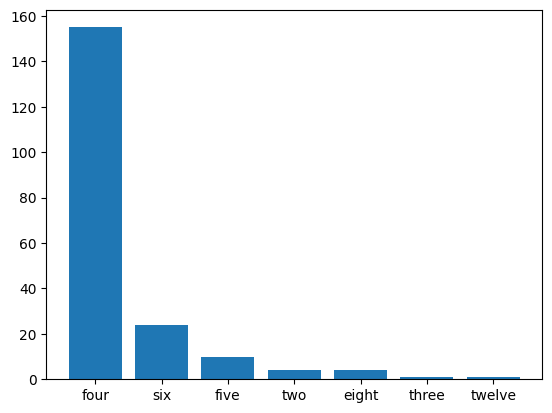

In [235]:
x = df['num-of-cylinders'].value_counts().index
y = df['num-of-cylinders'].value_counts()
plt.pyplot.bar(x,y)

TypeError: bar() missing 1 required positional argument: 'height'

In [243]:
bins = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 4)

In [245]:
names = ['low', 'medium', 'high']

In [248]:
df['hp_binned'] = pd.cut(df['horsepower'], bins, labels=names)

<BarContainer object of 3 artists>

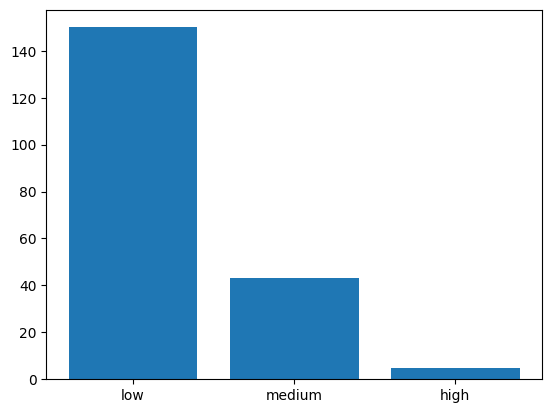

In [258]:
x = df['hp_binned'].value_counts().index
y = df['hp_binned'].value_counts()
pyplot.bar(x,y)

In [264]:
df['horsepower'] = df['hp_binned']

In [268]:
df.drop(columns=['hp_binned'],inplace=True)

In [274]:
df_fuel = pd.get_dummies(df['fuel-type'])

In [276]:
df_fuel.rename(columns={'gas':'fuel_type_gas','diesel':'fuel_type_diesel'},inplace=True)

In [278]:
df_fuel

,fuel_type_diesel,fuel_type_gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


In [280]:
df = pd.concat([df,df_fuel],axis=1)

In [287]:
df.drop(columns=['fuel-type'],inplace=True)

<BarContainer object of 2 artists>

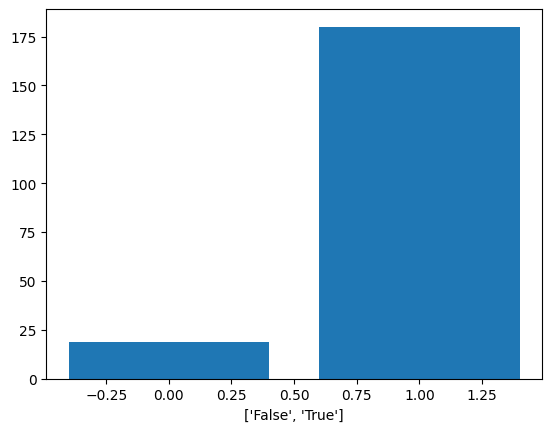

In [309]:
x = df['fuel_type_gas'].value_counts().index
y = df['fuel_type_gas'].value_counts()
labels=["False","True"]
pyplot.xlabel(labels)
pyplot.bar(x,y)

<BarContainer object of 2 artists>

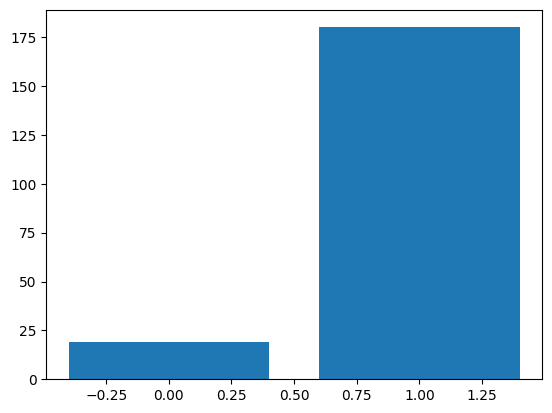

In [295]:
pyplot.bar(x,y)

In [312]:
df['aspiration'].unique()
df['aspiration'].value_counts()

aspiration
std      164
turbo     35
Name: count, dtype: int64

In [313]:
df_asp = pd.get_dummies(df['aspiration'])

In [325]:
df_asp.rename(columns={'std':'asp-std','turbo':'asp-turbo'}, inplace=True)
df = pd.concat([df,df_asp])

In [330]:
df.drop(columns=['aspiration'],inplace=True)

In [335]:
df['asp-std'].replace(np.NaN,True, inplace=True)

In [338]:
df['asp-turbo'].replace(np.NaN,False,inplace=True)

In [351]:
mean_loss = df['normalized-losses'].astype('float').mean()
df['normalized-losses'].replace(np.NaN,mean_loss,inplace=True)

In [357]:
df['symboling'].value_counts()

symboling
 0.0    64
 1.0    51
 2.0    32
 3.0    27
-1.0    22
-2.0     3
Name: count, dtype: int64